# Clustering Algorithms

By **AchyutGanti** and **Nathaniel Bowerman**

## Introduction

The idea was to dive a bit deeper into Clustering algorithms than what was discussed in the class.

We know that Clustering is an Unsupervised Machine learning technique that is used in grouping the data points together. It is called Unsupervised because unlike in Regression or Classification, we are not provided with labels using which we can train the algorithm to predict new data.

So, in theory the idea behind the clustering algorithms is that data points that fall in the same category should have similar properties and that are not in the same group should have dissimilar properties.


## Types of Clustering Algorithms

There are many techniques that are available to us to cluster data but the popular ones discussed here are

- K-means Clustering
- K-medians Clustering
- Mean Shift Clustering Algorithm
- EM Clustering
- DBSCAN

## K-Means Clustering Algorithm

Let us take a look at K-means algorithm first and try to implement it in Python. 

K-means is probably the most well known and well used algorithm of all the clustering algorithms out there. It is really simple to use and understand. The k-means algorithm requires us to mention the number of groups or the value of 'k' before the algorithm even begins grouping the data poins. 

It is based on this value that random centroids are initialized in the vector space. 

Now each data point is is classified based on the distance metric between the point and the centroid. The data point that is closest to a centroid is assigned to a particular group. 

After the above step the group centers are reassigned by calculating the mean of the data points in a specific group. 

the above steps are repeated again and again until we get reach a point where no more changes are seen in the group centers. 

Now let us take a look at the Pythonic implementation of K-means algorithm using the scikit-learn package. 

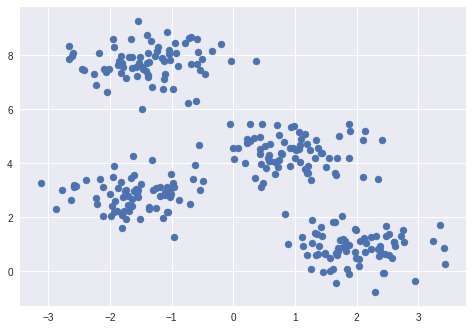

In [1]:
# Importing the required libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Creating a fake dataset to using make_blobs function in scikit learn. 

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


In [3]:
from sklearn.cluster import KMeans

# Fit the k-means library on the data. 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

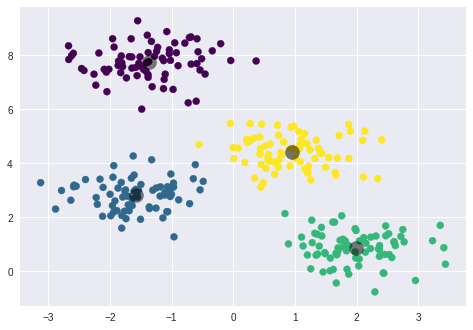

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


K-means algorithm grouped similar data together based on the k - value that we provided. Although the k-means algorithm has many advantages like being fast and easy, it has a downside. It requires us to choose the value of k beforehand and this can be not so efficient sometimes. Also, being dependent on means makes it sensitive to outliers.  

## K-medians

This is just a slight modification to the k-means algorithms. In k-means we compute the mean of the vector to adjust the group centers whereas in k-medians we compute the medians of the vector. 

Therefore, it is less sensitive to outliers. But the only downside of using this algorithm as opposed to the k-means is that it gets slower as the data gets bigger becuase we have to compute median after every iteration and that requires us to sort the data. So, the bigger the data, the computationally expensive it becomes. 

## Mean-shift Clustering Algorithm

This is another clustering algorithm that finds its applications mainly in computer vision and image segmentation. It is a sliding window based algorithm that attempts to finds the denser regions of the data points. 

Even this is centroid based but the one main difference between Mean shift and K-means is that the Mean shift algorithm doesnt calculate the distance between the data points and the centroid to assign groups. 

The way this algorithm works is that it begins with a sliding window centered at point A with a radius 'r' as the kernel. And this kernel or the window attempts to move towards the denser locations as we iterate. 

At every iteration the sliding window attempts to move towards the denser locations of the dataset by relocating the center point towards the region that has higher densities that the previous ones. It basically shifts the center point towards the mean of the points within that window. 

This process keeps on repeating untill we reach a point where there is no more changes in the center point and we have reached the densest point. At this stage, the data points are clustered together according to the sliding window in which they fall. 

For datasets with many possible clusters we assign randomly distributed sliding windows to start with so that the algorithm reaches the global maximum and does not gets saturated at the local minimas. 

Now let us take a look at the pythonic implementation of the mean shift algortihm :

In [19]:
# Loading the required libraires

import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')

In [20]:
## Create the data using random centers, 
centers = [[1,1,1],[5,5,5],[3,10,10]]
X,_ = make_blobs(n_samples=500, centers = centers,cluster_std=1)

In [21]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

[[  4.93452585   4.9231042    5.08278551]
 [  0.97486371   0.99661232   1.10636488]
 [  2.95947723   9.83694326  10.0236047 ]]


In [22]:
n_clusters_ = len(np.unique(labels))
print('number of estimated clulsters:',n_clusters_)

('number of estimated clulsters:', 3)


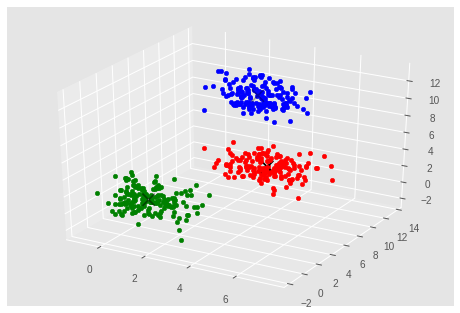

In [25]:
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2],c = colors[labels[i]],
               marker = 'o')
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],
           cluster_centers[:,2],
          marker='x',color='k',s=150,linewidths=5,zorder=10)
plt.show()

As seen in the above example, the mean shift algorithm is effective in grouping similar data together. But the algorithm has its downsides. 
It requires us to set a value for the radius and the performance of the algorithm depends on this size of the sliding window. Lower the value of the radius, the algorithm takes a lot if time converging to the optimal location. If we choose a higher value for the sliding window, it might overshoot the global maximum and fall off in the local maximums. 